# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score


In [ ]:
import pandas as pd

# Load the dataset
url = 'https://github.com/Leonard-Simala/Datasets/raw/refs/heads/main/fetal_health.csv'
df = pd.read_csv(url)

# Check the first few rows of the dataset
df.head()


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [ ]:
df.isna()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2122,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2123,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2124,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isna().sum(axis=0)

,0
baseline value,0
accelerations,0
fetal_movement,0
uterine_contractions,0
light_decelerations,0
severe_decelerations,0
prolongued_decelerations,0
abnormal_short_term_variability,0
mean_value_of_short_term_variability,0
percentage_of_time_with_abnormal_long_term_variability,0


In [ ]:
# Bar plot for fetal_health value counts
import plotly.graph_objs as go
import plotly.subplots as sp

bar_fig = go.Bar(
    x=(df['fetal_health']-1).value_counts().index,
    y=(df['fetal_health']-1).value_counts().values,
    marker=dict(color='#66C2A5')
)

# Pie chart for fetal_health value counts
pie_fig = go.Pie(
    labels=(df['fetal_health']-1).value_counts().index,
    values=(df['fetal_health']-1).value_counts().values,
    hole=0.3  # Optional: for a donut-style pie chart
)

# Create subplots with Plotly
fig = sp.make_subplots(
    rows=1, cols=2,
    subplot_titles=("Bar Plot", "Pie Chart"),
    specs=[[{"type": "bar"}, {"type": "pie"}]]
)

# Add the bar plot to the first subplot
fig.add_trace(bar_fig, row=1, col=1)

# Add the pie chart to the second subplot
fig.add_trace(pie_fig, row=1, col=2)

# Update layout for better visualization
fig.update_layout(
    title_text="Fetal Health Distribution",
    showlegend=False,  # Hide legend to avoid redundancy in pie chart
    height=500,
    width=700
)

# Show the figure
fig.show()

## Visualizing Data Distributions with histplot

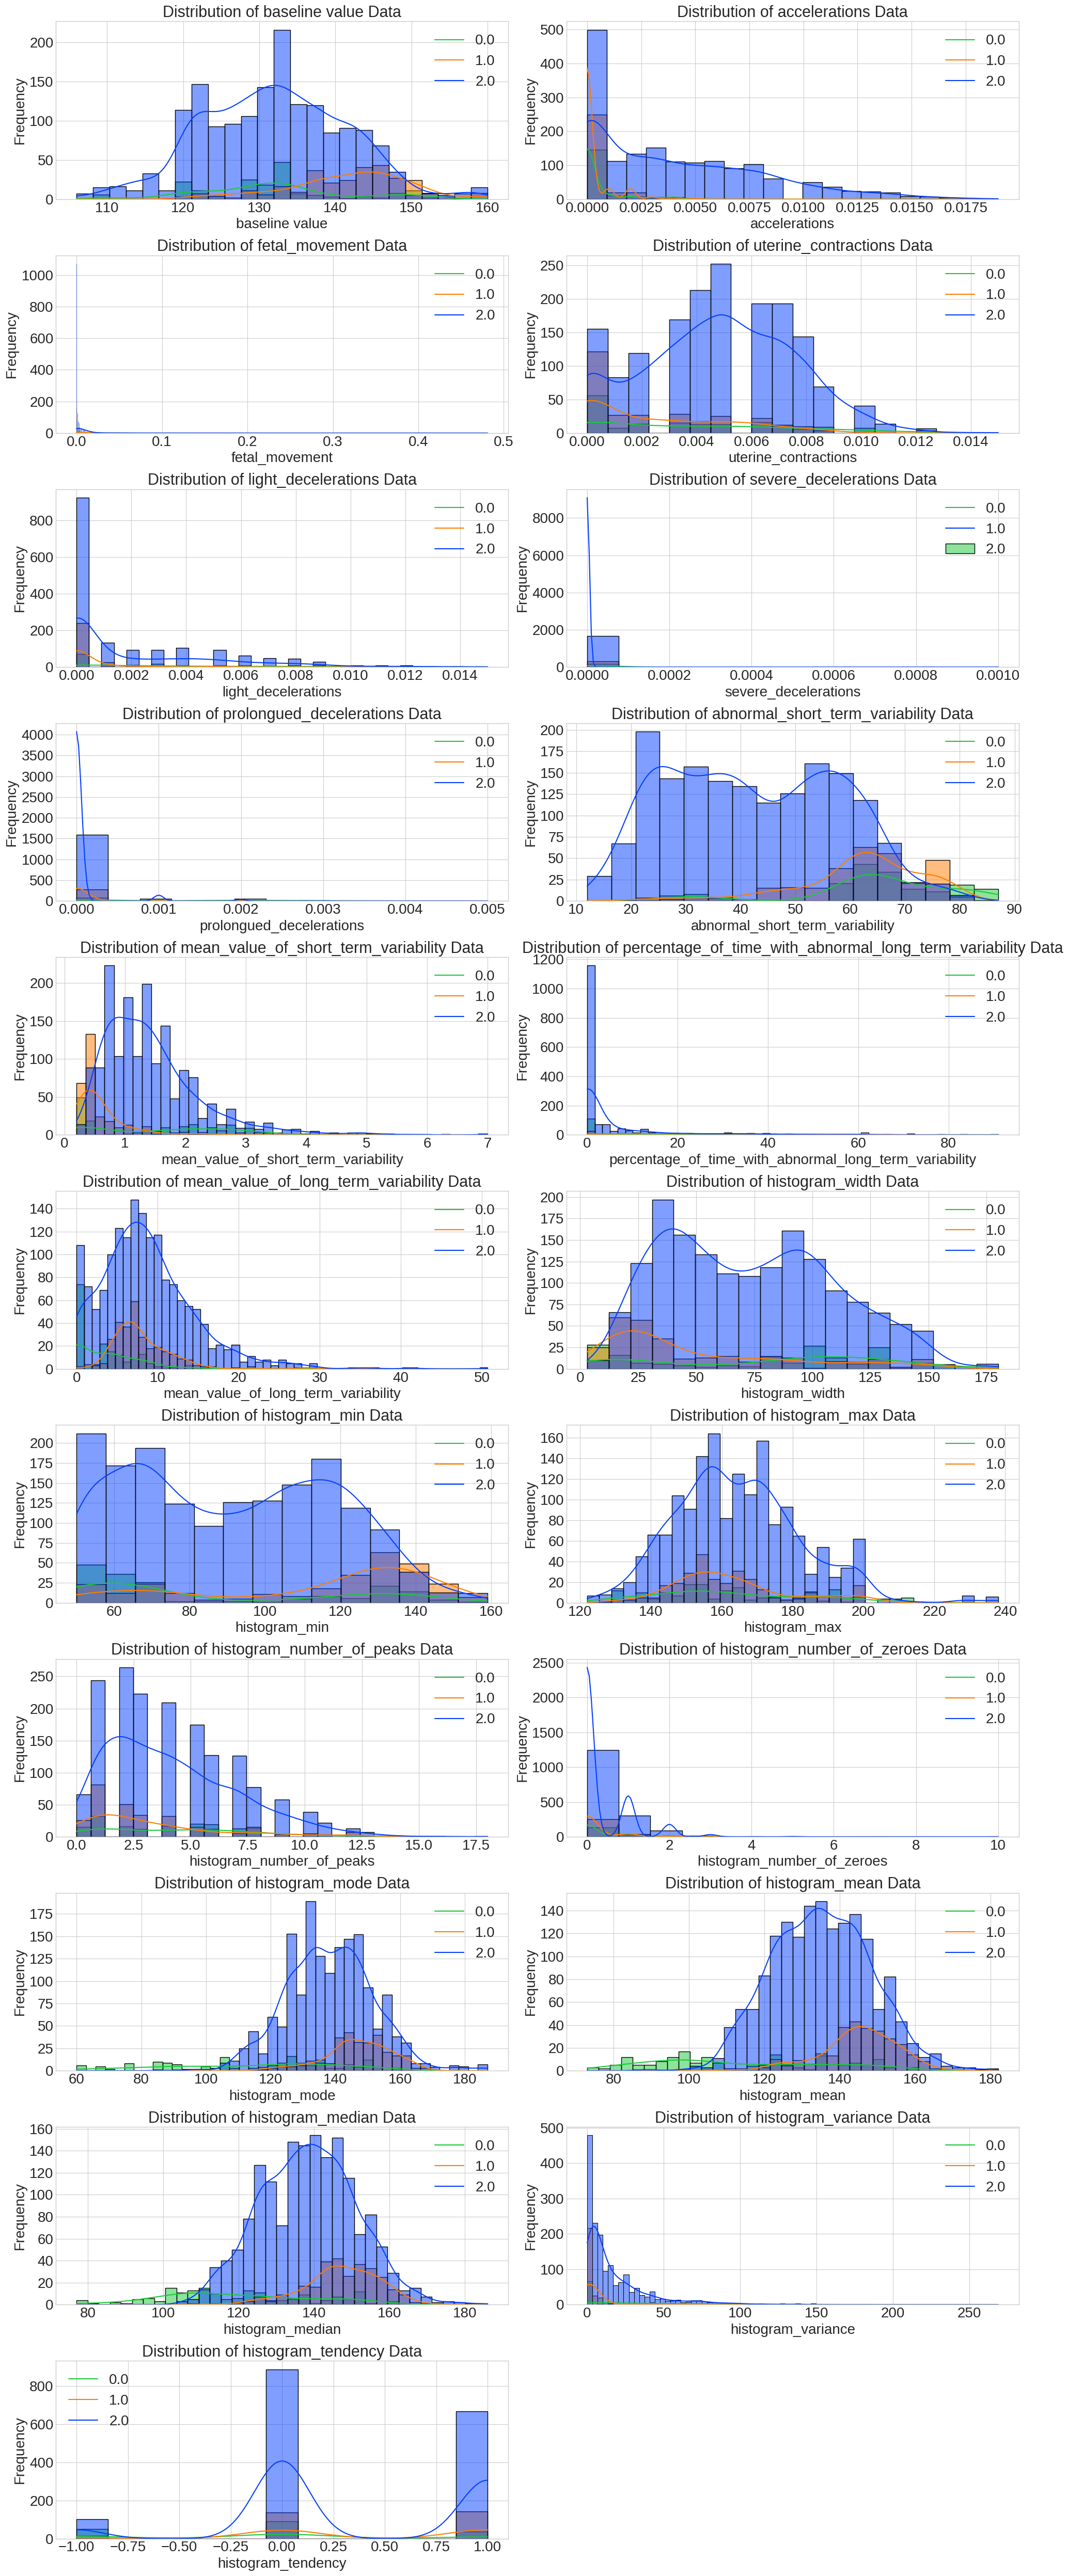

In [ ]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

# Suppress warnings
warnings.filterwarnings('ignore')

# Set seaborn style
plt.style.use('seaborn-v0_8-whitegrid')

# Drop the target variable from the features
X = df.drop('fetal_health', axis=1)

# Create the figure
plt.figure(figsize=(20, 50))
num_row = 1

# Loop through each column to create the subplots
for col in X.columns:
    plt.subplot(11, 2, num_row)

    # Set title with larger font size
    plt.title(f"Distribution of {col} Data", fontsize=22)

    # Plot histogram with KDE and hue
    sns.histplot(x=df[col], kde=True, hue=df['fetal_health'], palette='bright')

    # Set x and y axis labels with larger font size
    plt.xlabel(col, fontsize=20)
    plt.ylabel('Frequency', fontsize=20)

    # Set larger font size for ticks
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    # Set larger font size for the legend
    plt.legend(df['fetal_health'].value_counts().index-1,title_fontsize='20', fontsize='20')
    #plt.legend(title='fetal_health',title_fontsize='15', fontsize='15')
    # Adjust layout
    plt.tight_layout()

    num_row += 1

# Show the plots

plt.show()


## Visualizing Data Distributions with Box-Plot

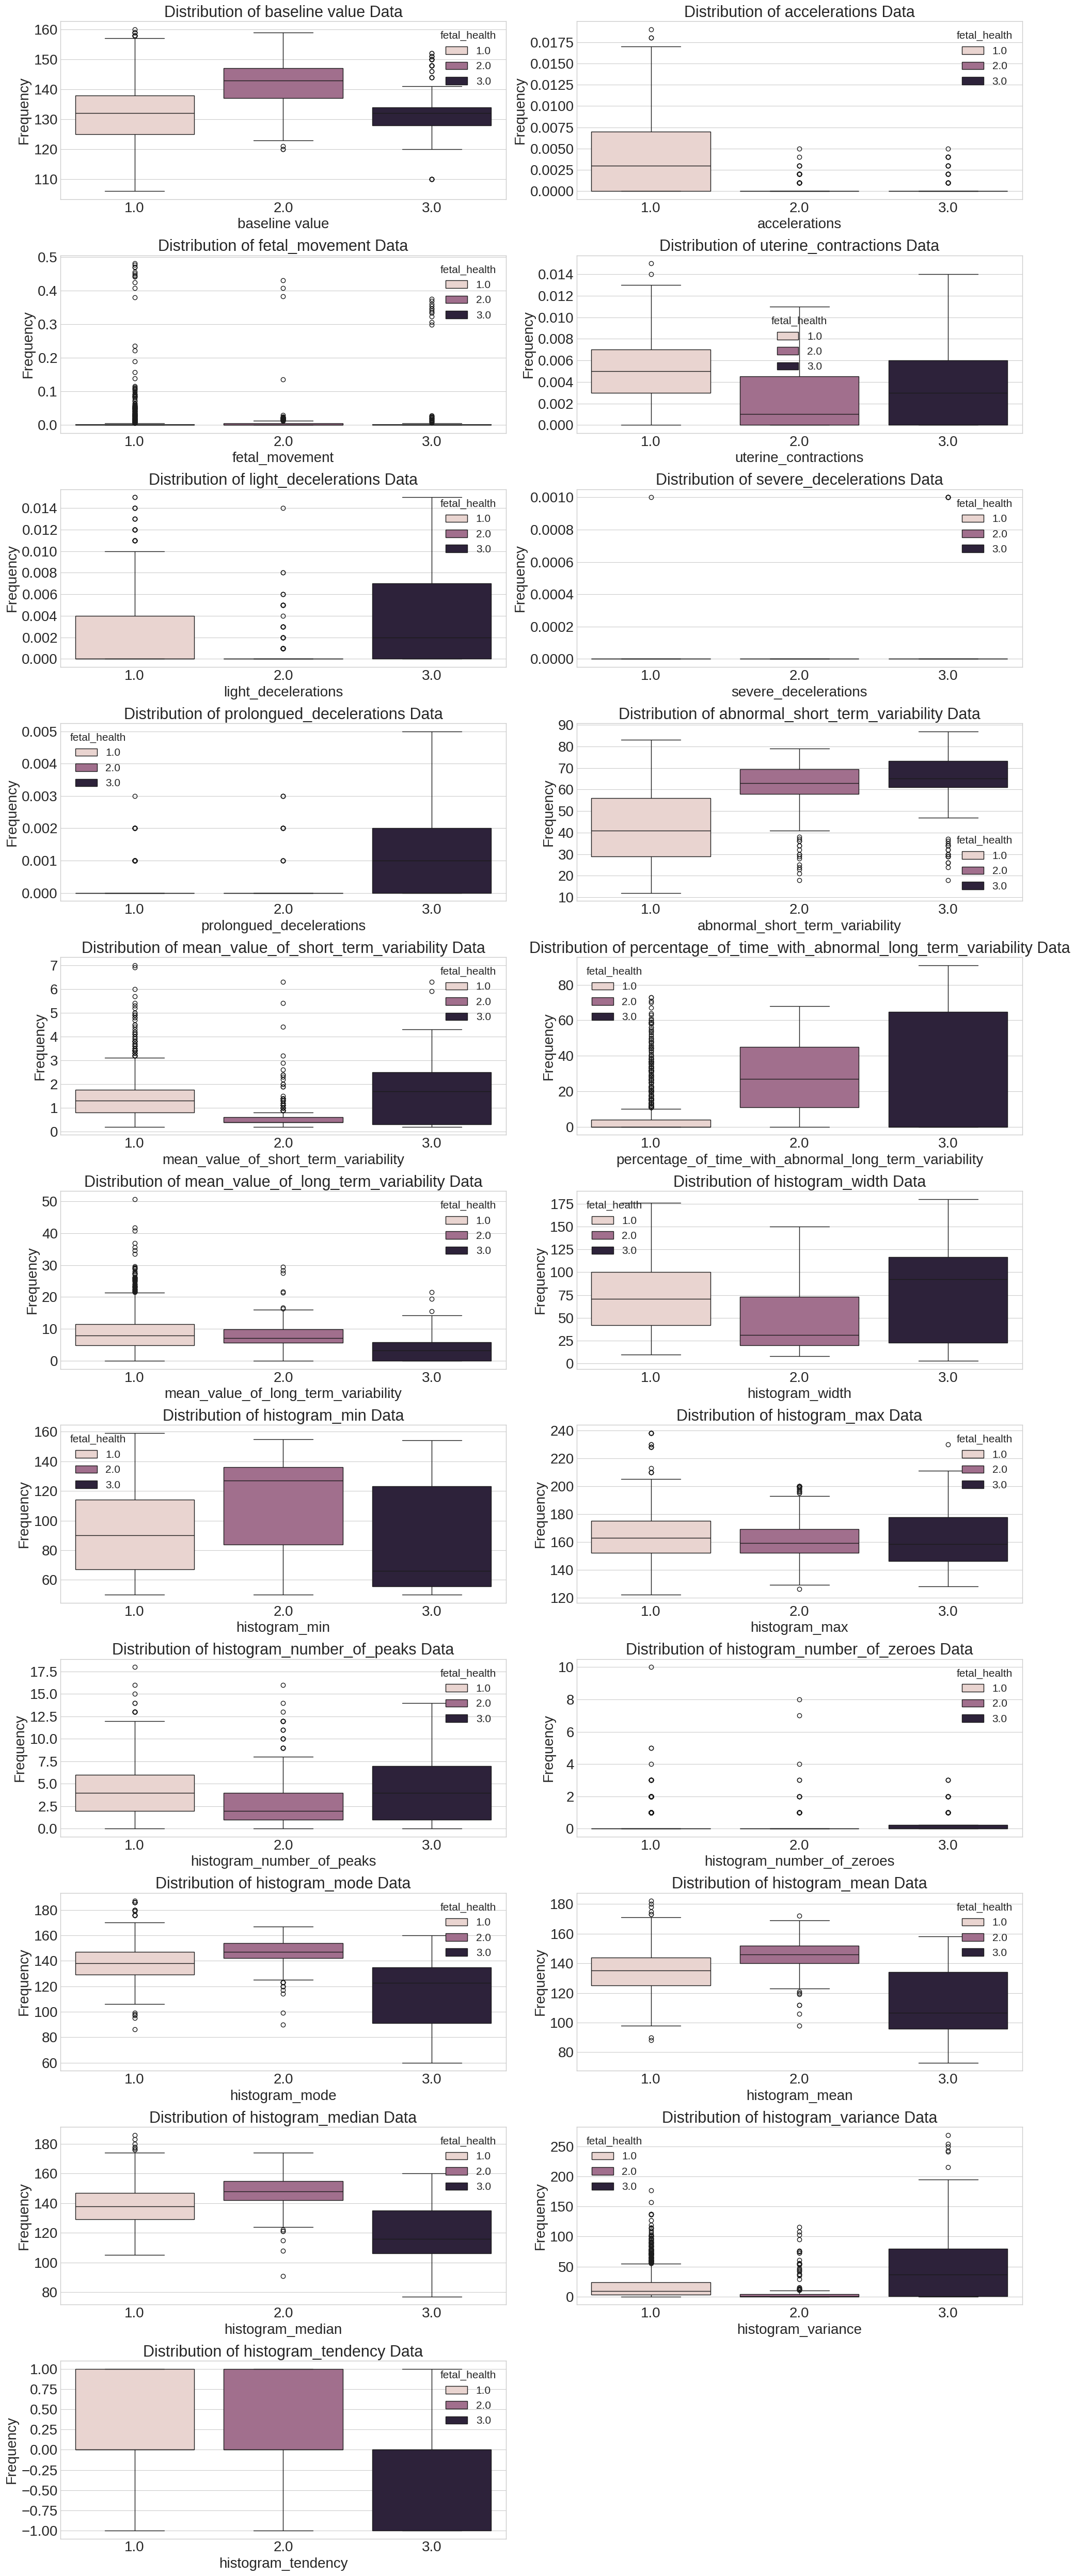

In [ ]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

# Suppress warnings
warnings.filterwarnings('ignore')

# Set seaborn style
plt.style.use('seaborn-v0_8-whitegrid')

# Drop the target variable from the features
X = df.drop('fetal_health', axis=1)

# Create the figure
plt.figure(figsize=(20, 50))
num_row = 1

# Loop through each column to create the subplots
for col in X.columns:
    plt.subplot(11, 2, num_row)

    # Set title with larger font size
    plt.title(f"Distribution of {col} Data", fontsize=22)

    # Plot histogram with KDE and hue
    sns.boxplot(y=df[col], x=df['fetal_health'],hue=df['fetal_health'])

    # Set x and y axis labels with larger font size
    plt.xlabel(col, fontsize=20)
    plt.ylabel('Frequency', fontsize=20)

      # Set larger font size for ticks
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    # Set larger font size for the legend
    plt.legend(title='fetal_health',title_fontsize='15', fontsize='15')

    # Adjust layout
    plt.tight_layout()

    num_row += 1

# Show the plots

plt.show()

## Bivariate Analysis with pairplot

In [ ]:
sns.pairplot(df, hue='fetal_health', corner=True, palette='bright', height=5)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Bivariate Analysis with Heatmaps

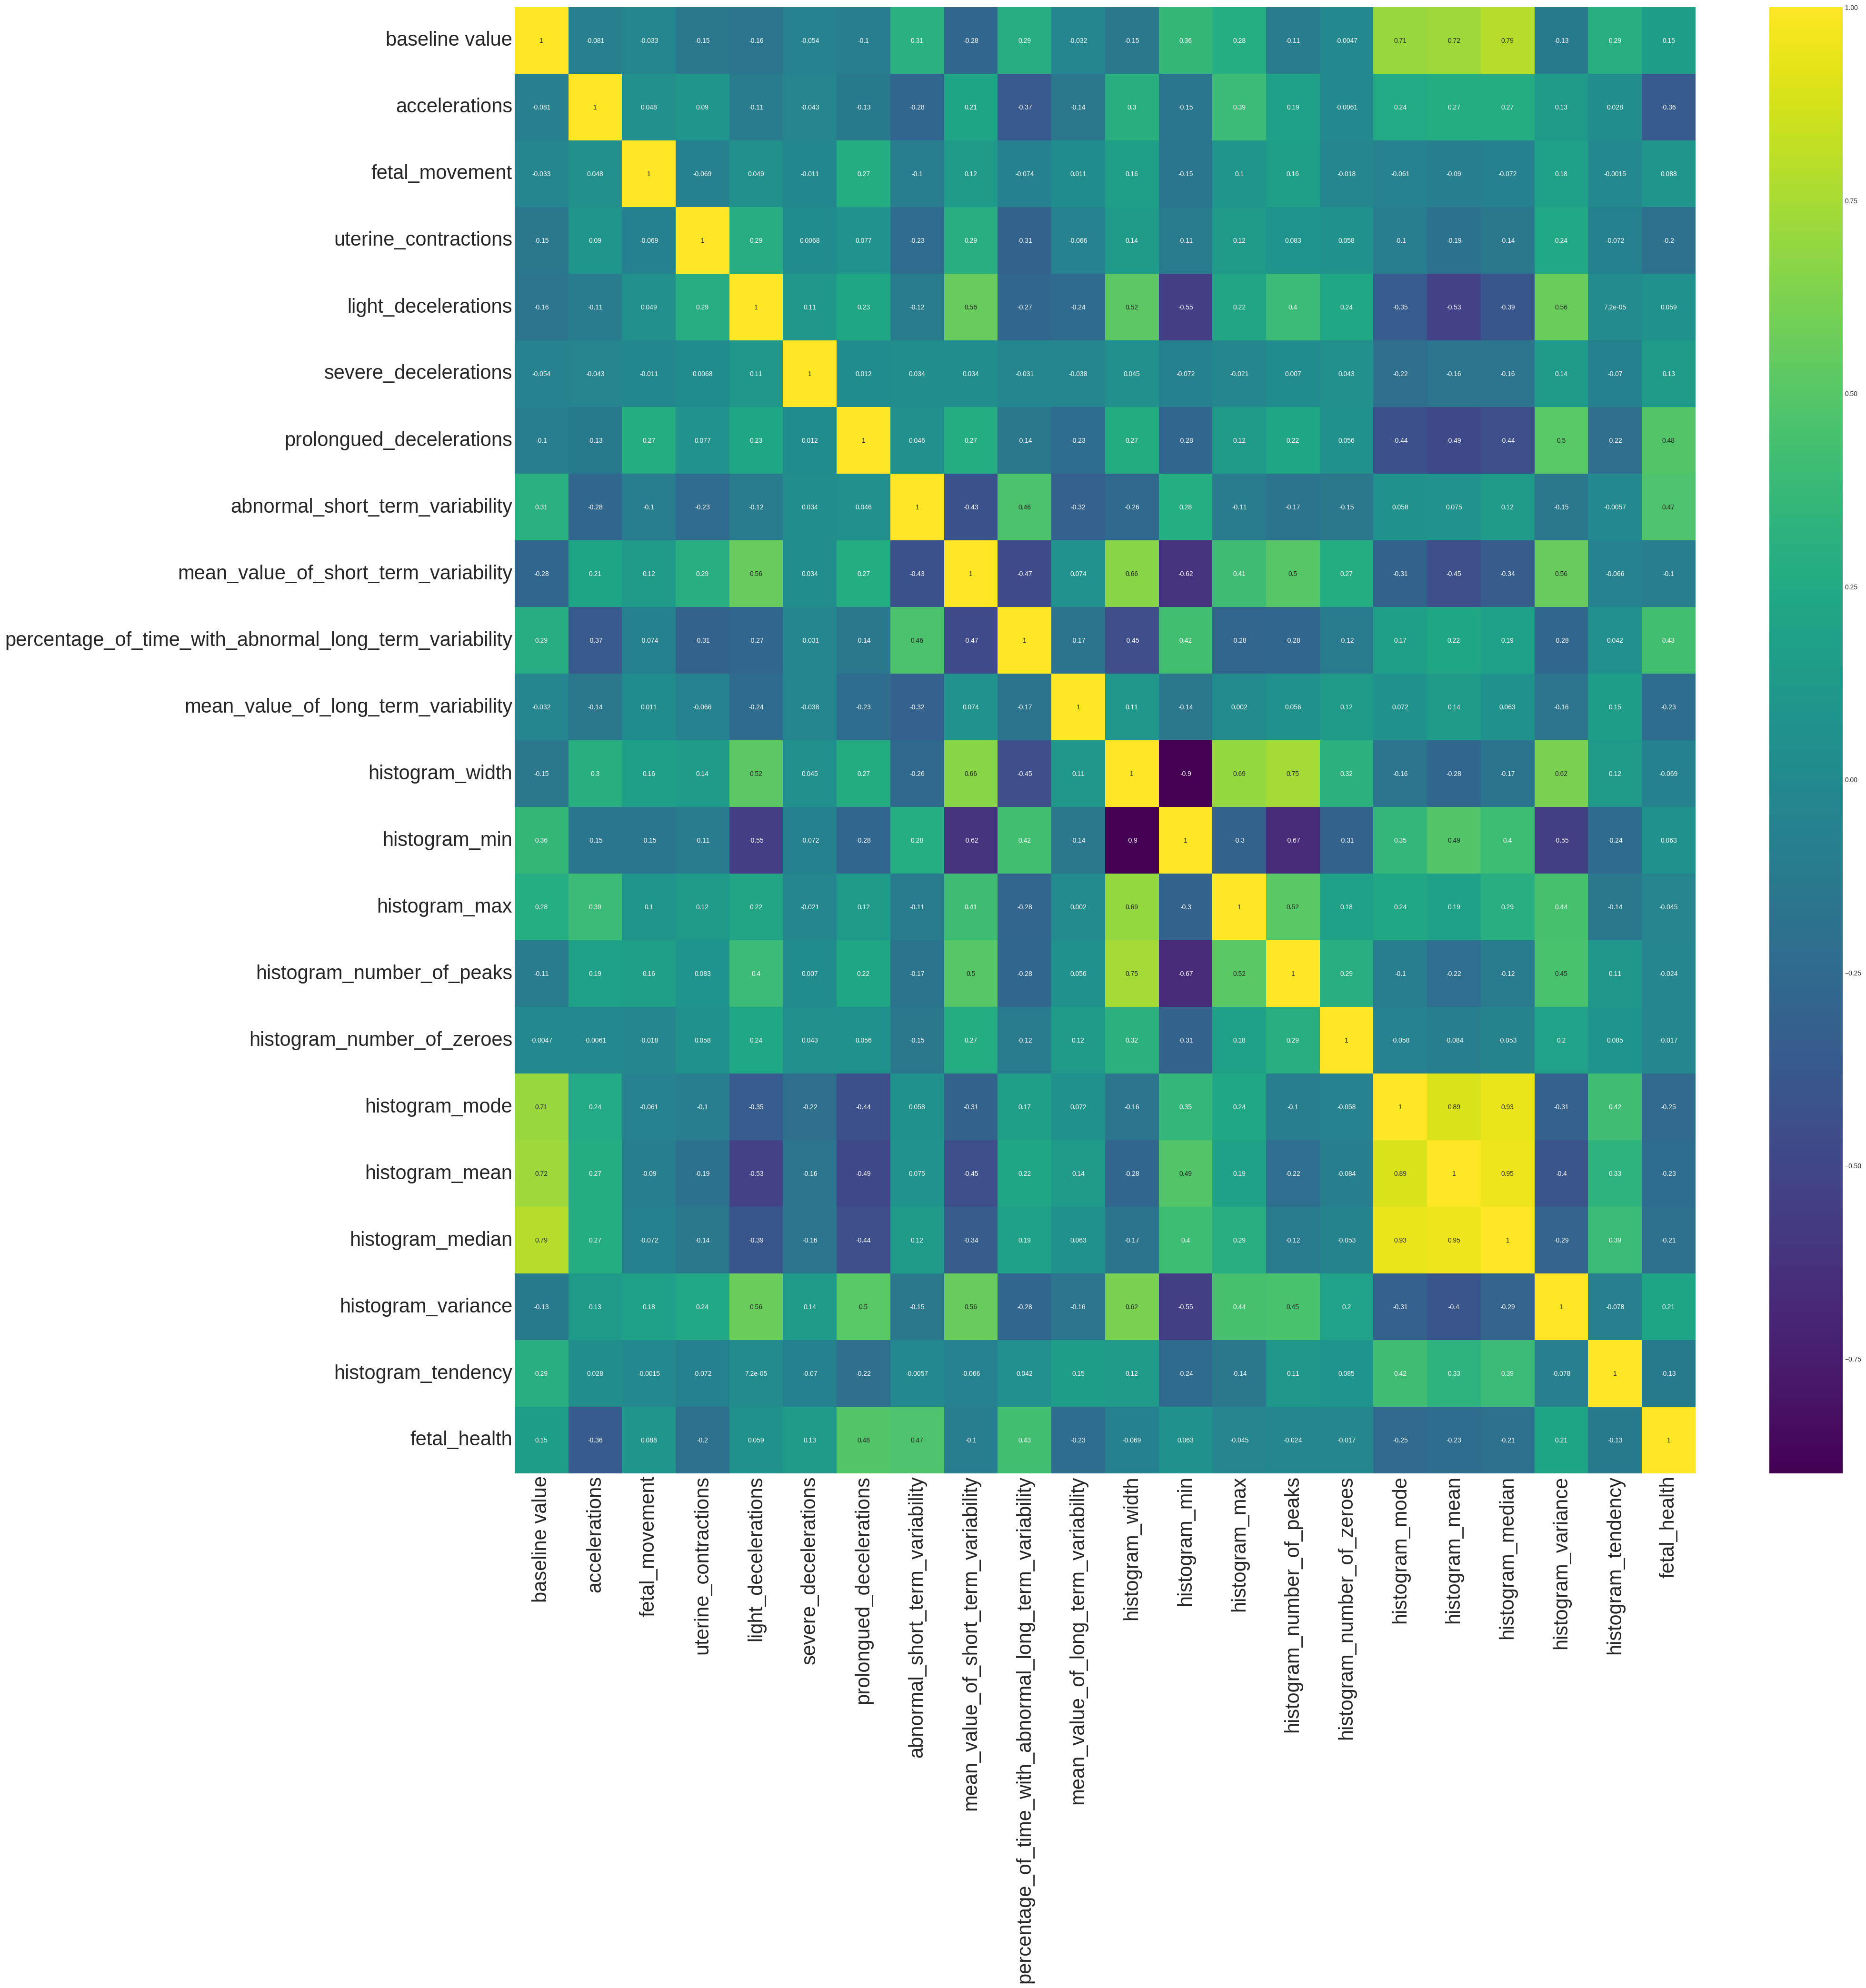

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the figure
plt.figure(figsize=(40, 40))

# Plot the heatmap
sns.heatmap(df.corr(), annot=True, cmap='viridis')


plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

# Show the plot
plt.show()

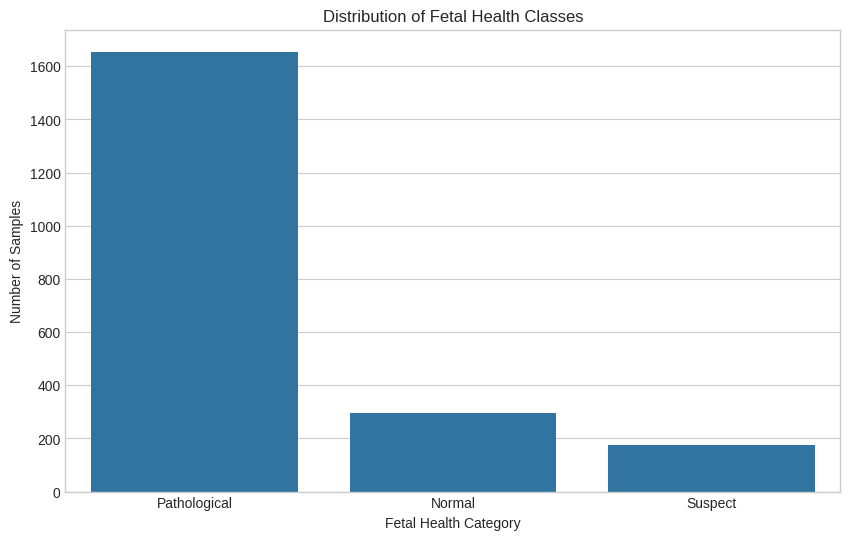

In [ ]:
## Class distribution
class_distribution = df['fetal_health'].value_counts()


class_percentages = df['fetal_health'].value_counts(normalize=True) * 100


plt.figure(figsize=(10, 6))
sns.countplot(x='fetal_health', data=df)
plt.title('Distribution of Fetal Health Classes')
plt.xlabel('Fetal Health Category')
plt.ylabel('Number of Samples')
plt.xticks([0, 1, 2], ['Pathological', 'Normal', 'Suspect'])
plt.show()

fetal_health_map = {
    1: 'Normal',
    2: 'Suspect',
    3: 'Pathological'
}
df['fetal_health_label'] = df['fetal_health'].map(fetal_health_map)

In [ ]:
skewed_features = df.drop(['fetal_health', 'fetal_health_label'], axis=1).apply(lambda x: skew(x)).sort_values(ascending=False)
print("Skewed features:")
print(skewed_features[abs(skewed_features) > 0.75])

skewed_cols = skewed_features[abs(skewed_features) > 0.75].index
df[skewed_cols] = df[skewed_cols].apply(lambda x: np.log1p(x))

Skewed features:
severe_decelerations                                      17.341211
fetal_movement                                             7.805965
prolongued_decelerations                                   4.320914
histogram_number_of_zeroes                                 3.917521
histogram_variance                                         3.217702
percentage_of_time_with_abnormal_long_term_variability     2.193526
light_decelerations                                        1.717224
mean_value_of_short_term_variability                       1.656170
mean_value_of_long_term_variability                        1.331058
accelerations                                              1.203542
histogram_number_of_peaks                                  0.892256
histogram_mode                                            -0.994476
dtype: float64


In [ ]:
df_features = df.drop(['fetal_health', 'fetal_health_label'], axis=1)

Q1 = df_features.quantile(0.25)
Q3 = df_features.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[~((df_features < lower_bound) | (df_features > upper_bound)).any(axis=1)]

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(['fetal_health', 'fetal_health_label'], axis=1))

scaled_df = pd.DataFrame(scaled_features, columns=df.drop(['fetal_health', 'fetal_health_label'], axis=1).columns)
scaled_df['fetal_health'] = df['fetal_health'].values

In [ ]:
scaled_df['fetal_health'] = scaled_df['fetal_health'].astype(int)
scaled_df['fetal_health'] = scaled_df['fetal_health'].astype('category')

In [ ]:
from sklearn.model_selection import train_test_split
X = scaled_df.drop(['fetal_health'], axis=1)
y = scaled_df['fetal_health']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:")
print(pd.Series(y_train).value_counts())

Class distribution after SMOTE:
fetal_health
1    739
2    739
3    739
Name: count, dtype: int64


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf_results = {}
n_trees_list = [100, 300, 1000]

for n_trees in n_trees_list:
    rf = RandomForestClassifier(
        n_estimators=n_trees,
        random_state=42,
        class_weight='balanced'
    )

    cv_scores = cross_val_score(
        rf, X_train, y_train,
        cv=5, scoring='balanced_accuracy'
    )

    rf_results[n_trees] = {
        'mean_cv_score': cv_scores.mean(),
        'std_cv_score': cv_scores.std()
    }

print("\nRandom Forest Cross-Validation Results:")
for n_trees, results in rf_results.items():
    print(f"{n_trees} trees: {results['mean_cv_score']:.4f} ± {results['std_cv_score']:.4f}")


Random Forest Cross-Validation Results:
100 trees: 0.9761 ± 0.0112
300 trees: 0.9797 ± 0.0117
1000 trees: 0.9779 ± 0.0126


In [ ]:
best_trees = max(rf_results, key=lambda k: rf_results[k]['mean_cv_score'])

# Train final Random Forest model
final_rf = RandomForestClassifier(
    n_estimators=best_trees,
    random_state=42,
    class_weight='balanced'
)
final_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=300,
                       random_state=42)

In [ ]:
## Evaluation
from sklearn.metrics import classification_report
y_pred = final_rf.predict(X_test)
print("\nRandom Forest Test Set Performance:")
print(classification_report(y_test, y_pred))


Random Forest Test Set Performance:
              precision    recall  f1-score   support

           1       0.94      0.97      0.96       185
           2       0.81      0.67      0.73        39
           3       0.83      0.91      0.87        11

    accuracy                           0.92       235
   macro avg       0.86      0.85      0.85       235
weighted avg       0.92      0.92      0.92       235



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_results = {}
n_estimators_list = [100, 200]
learning_rates = [0.01, 0.1, 1]

for n_estimators in n_estimators_list:
    for lr in learning_rates:
        gb = GradientBoostingClassifier(
            n_estimators=n_estimators,
            learning_rate=lr,
            random_state=42
        )

        cv_scores = cross_val_score(
            gb, X_train, y_train,
            cv=5, scoring='balanced_accuracy'
        )

        gb_results[(n_estimators, lr)] = {
            'mean_cv_score': cv_scores.mean(),
            'std_cv_score': cv_scores.std()
        }

# Print Gradient Boosting Cross-Validation Results
print("\nGradient Boosting Cross-Validation Results:")
for (n_estimators, lr), results in gb_results.items():
    print(f"Estimators: {n_estimators}, LR: {lr}: {results['mean_cv_score']:.4f} ± {results['std_cv_score']:.4f}")


Gradient Boosting Cross-Validation Results:
Estimators: 100, LR: 0.01: 0.9220 ± 0.0152
Estimators: 100, LR: 0.1: 0.9702 ± 0.0176
Estimators: 100, LR: 1: 0.9752 ± 0.0184
Estimators: 200, LR: 0.01: 0.9296 ± 0.0106
Estimators: 200, LR: 0.1: 0.9738 ± 0.0177
Estimators: 200, LR: 1: 0.9752 ± 0.0196


- The model performs excellently overall, achieving an accuracy of 92% on the test set, which closely aligns with the cross-validation performance during training (∼97.6%). The balanced evaluation metrics, particularly the **macro average F1-score (0.87)**, suggest the model generalizes well across all classes. The consistent performance between the training and test sets is indicative of a model that is not overfitting

- The recall for Class 2 (0.67) is notably lower than for the other classes, indicating that the model struggles to correctly identify all instances of Class 2. This could be attributed to the class imbalance, with Class 2 having significantly fewer samples (39) compared to Class 1 (185).  can address this using techniques like oversampling, undersampling, or using synthetic data generation methods like SMOTE to balance the classes further. i also will y, experiment with different model architectures or hyperparameters to improve the recall for this underrepresented class.

- The model performs well for Class 1 and Class 3, with F1-scores of 0.96 and 0.92, respectively. These high F1-scores indicate that the model is effectively balancing precision and recall for these classes, making it reliable for predictions in these categories.

- While the use of `class_weight='balanced'` helps address class imbalance by adjusting the weights during training, the small sample sizes in Classes 2 and 3 can still have an adverse effect on performance. Techniques like cost-sensitive learning or using ensemble methods (e.g., Random Forests or Gradient Boosting) could further help mitigate the impact of class imbalance. Additionally, tuning the decision threshold for classification might improve performance in identifying minority classes, particularly in applications where false positives or false negatives are costly.

- It would be valuable to perform additional error analysis to investigate misclassifications in Class 2 and explore potential correlations with features. This could provide insights into the specific instances where the model underperforms, enabling more targeted improvements.

- To further assess the robustness of the model, i will evaluate it with additional metrics such as the ROC-AUC score or Precision-Recall AUC, especially when dealing with imbalanced classes. These metrics offer a more nuanced view of the model's ability to discriminate between classes, particularly for the minority class.

- If the model is intended for deployment, conducting an analysis on its performance over time (e.g., monitoring for concept drift) would be critical to ensure that the model continues to provide accurate predictions as new data becomes available.

- Finally, experimenting with more advanced regularization techniques (e.g., ElasticNet regularization) and feature engineering could further enhance the model's performance, especially in complex datasets with many features.